In [8]:
import nltk
import numpy as np
import pandas as pd
import pickle
from nltk.corpus import stopwords

In [10]:
data = pd.read_csv('moviereviews.tsv', sep='\t')
data.head(10)

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
5,neg,"to put it bluntly , ed wood would have been pr..."
6,neg,"synopsis : melissa , a mentally-disturbed woma..."
7,neg,tim robbins and martin lawernce team up in thi...
8,neg,"in "" gia "" , angelina jolie plays the titular ..."
9,neg,"in 1990 , the surprise success an unheralded l..."


In [11]:
print("Data Set info:")
print(data.info())

Data Set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [12]:
print("Displaying first review:")
from IPython.display import Markdown, display
display(Markdown('> '+data['review'][0]))

Displaying first review:


> how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
the plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . 
deciding to check out the long-abandoned house , they soon learn that it's worth a fortune and set about selling it in auction to the highest bidder . 
but battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . 
the story alternates between unfunny scenes of the brothers bickering over what to do with their inheritance and endless action sequences as the two take on their increasingly determined furry foe . 
whatever promise the film starts with soon deteriorates into boring dialogue , terrible overacting , and increasingly uninspired slapstick that becomes all sound and fury , signifying nothing . 
the script becomes so unspeakably bad that the best line poor lee evens can utter after another run in with the rodent is : " i hate that mouse " . 
oh cringe ! 
this is home alone all over again , and ten times worse . 
one touching scene early on is worth mentioning . 
we follow the mouse through a maze of walls and pipes until he arrives at his makeshift abode somewhere in a wall . 
he jumps into a tiny bed , pulls up a makeshift sheet and snuggles up to sleep , seemingly happy and just wanting to be left alone . 
it's a magical little moment in an otherwise soulless film . 
a message to speilberg : if you want dreamworks to be associated with some kind of artistic credibility , then either give all concerned in mouse hunt a swift kick up the arse or hire yourself some decent writers and directors . 
this kind of rubbish will just not do at all . 


In [13]:
data.isnull().sum()

label      0
review    35
dtype: int64

In [14]:
data.dropna(inplace=True)
len(data)

1965

In [15]:
print("Detecting and removing empty string")
blanks = [] 

for i,label1,review1 in data.itertuples(): 
    if type(review1)==str:            
        if review1.isspace():        
            blanks.append(i)     
        
print(len(blanks), 'Blanks: ', blanks)

Detecting and removing empty string
27 Blanks:  [57, 71, 147, 151, 283, 307, 313, 323, 343, 351, 427, 501, 633, 675, 815, 851, 977, 1079, 1299, 1455, 1493, 1525, 1531, 1763, 1851, 1905, 1993]


In [16]:
data.drop(blanks, inplace=True)
len(data)

1938

In [17]:
data['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

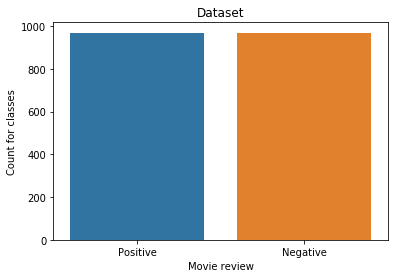

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
positive = data['label'].value_counts()[0]
negative = data['label'].value_counts()[1]
sns.barplot(['Positive','Negative'],[positive,negative])
plt.xlabel('Movie review')
plt.ylabel('Count for classes')
plt.title('Dataset')
plt.show()

In [19]:
print("Preprocessing")
data['review'] = data['review'].str.replace("[^a-zA-Z]", " ")

data['review'] = data['review'].str.lower()

print("Displaying first review:")
from IPython.display import Markdown, display
display(Markdown('> '+data['review'][0]))

Preprocessing
Displaying first review:


> how do films like mouse hunt get into theatres     isn t there a law or something     this diabolical load of claptrap from steven speilberg s dreamworks studio is hollywood family fare at its deadly worst     mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat out stupid slapstick that makes comedies like jingle all the way look decent by comparison     writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill     the plot   for what its worth   concerns two brothers   nathan lane and an appalling lee evens   who inherit a poorly run string factory and a seemingly worthless house from their eccentric father     deciding to check out the long abandoned house   they soon learn that it s worth a fortune and set about selling it in auction to the highest bidder     but battling them at every turn is a very smart mouse   happy with his run down little abode and wanting it to stay that way     the story alternates between unfunny scenes of the brothers bickering over what to do with their inheritance and endless action sequences as the two take on their increasingly determined furry foe     whatever promise the film starts with soon deteriorates into boring dialogue   terrible overacting   and increasingly uninspired slapstick that becomes all sound and fury   signifying nothing     the script becomes so unspeakably bad that the best line poor lee evens can utter after another run in with the rodent is     i hate that mouse       oh cringe     this is home alone all over again   and ten times worse     one touching scene early on is worth mentioning     we follow the mouse through a maze of walls and pipes until he arrives at his makeshift abode somewhere in a wall     he jumps into a tiny bed   pulls up a makeshift sheet and snuggles up to sleep   seemingly happy and just wanting to be left alone     it s a magical little moment in an otherwise soulless film     a message to speilberg   if you want dreamworks to be associated with some kind of artistic credibility   then either give all concerned in mouse hunt a swift kick up the arse or hire yourself some decent writers and directors     this kind of rubbish will just not do at all     

In [20]:
from sklearn.model_selection import train_test_split
X = data['review']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

In [22]:
print("Building model: Naive Bayes")
model_naive = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('clf', MultinomialNB()),])
model_naive.fit(X_train, y_train)

Building model: Naive Bayes


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [23]:
prediction = model_naive.predict(X_test)

In [24]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,prediction))

[[274  34]
 [ 97 235]]


In [25]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

         neg       0.74      0.89      0.81       308
         pos       0.87      0.71      0.78       332

    accuracy                           0.80       640
   macro avg       0.81      0.80      0.79       640
weighted avg       0.81      0.80      0.79       640



In [26]:
print(metrics.accuracy_score(y_test,prediction))

0.7953125


In [27]:
print("Building model: Liner SVC")
model_svc = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('clf', LinearSVC()),])
model_svc.fit(X_train, y_train)

Building model: Liner SVC


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [28]:
prediction_svc = model_svc.predict(X_test)

In [29]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,prediction_svc))


[[250  58]
 [ 54 278]]


In [30]:
print(metrics.classification_report(y_test,prediction_svc))

              precision    recall  f1-score   support

         neg       0.82      0.81      0.82       308
         pos       0.83      0.84      0.83       332

    accuracy                           0.82       640
   macro avg       0.82      0.82      0.82       640
weighted avg       0.82      0.82      0.82       640



In [31]:
print(metrics.accuracy_score(y_test,prediction_svc))


0.825


In [32]:
print("Building model: Random Forest")
from sklearn.ensemble import RandomForestClassifier
model_rf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('clf', RandomForestClassifier(n_estimators=1000, random_state=0)),])
model_rf.fit(X_train, y_train)

Building model: Random Forest


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [33]:
prediction_rf = model_rf.predict(X_test)

In [34]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,prediction_rf))

[[278  30]
 [ 97 235]]


In [35]:
print(metrics.classification_report(y_test,prediction_rf))

              precision    recall  f1-score   support

         neg       0.74      0.90      0.81       308
         pos       0.89      0.71      0.79       332

    accuracy                           0.80       640
   macro avg       0.81      0.81      0.80       640
weighted avg       0.82      0.80      0.80       640



In [36]:
print(metrics.accuracy_score(y_test,prediction_rf))

0.8015625


In [37]:
print("Best accuracy is of Liner SVC model. Using this model to classify input reviews.")

Best accuracy is of Liner SVC model. Using this model to classify input reviews.


In [38]:
def predict_review(y):
    x = model_svc.predict([y])
    if x == 'neg':
        print("Negative Review")
    else:
        print("Positive Review")

In [39]:
input_review = "Trailer of this movie was so good but when I saw the movie, it was not matching my expectations. The plot and scenes were boring"


In [40]:
predict_review(input_review)

Negative Review


In [41]:
input_review1="This movie was very different from the typical plots we see nowadays. It will definitely win many awards this year."

In [42]:
predict_review(input_review1)

Positive Review
